In [1]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import pickle
import sklearn
import re
%matplotlib inline  

In [2]:
def save(obj):
    with open('sis.pickle', 'wb') as f:
        pickle.dump(obj, f)

def load():
    with open('sis.pickle', 'rb') as f:
        obj_new = pickle.load(f)
    return obj_new

In [3]:
oldmails = pd.read_csv('spam.csv', encoding = 'latin-1')
oldmails.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
mailz = pd.read_csv('messages.csv', encoding = 'latin-1')
mailz.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [5]:
oldmails.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)
oldmails.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
mailz.drop(['subject'], axis = 1, inplace = True)
mailz.head()

,message,label
0,content - length : 3386 apple-iss research cen...,0
1,"lang classification grimes , joseph e . and ba...",0
2,i am posting this inquiry for sergei atamas ( ...,0
3,a colleague and i are researching the differin...,0
4,earlier this morning i was on the phone with a...,0


In [7]:
oldmails.rename(columns = {'v1': 'labels', 'v2': 'message'}, inplace = True)
oldmails.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
oldmails['labels'].value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

In [9]:
mailz['label'].value_counts()

0    2412
1     481
Name: label, dtype: int64

In [10]:
oldmails['label'] = oldmails['labels'].map({'ham': 0, 'spam': 1})
oldmails.head()

,labels,message,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [11]:
oldmails.drop(['labels'], axis = 1, inplace = True)
oldmails.head()

,message,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [12]:
mails = pd.concat((mailz, oldmails), ignore_index=True)
print(mails)

                                                message  label
0     content - length : 3386 apple-iss research cen...      0
1     lang classification grimes , joseph e . and ba...      0
2     i am posting this inquiry for sergei atamas ( ...      0
3     a colleague and i are researching the differin...      0
4     earlier this morning i was on the phone with a...      0
...                                                 ...    ...
8460  This is the 2nd time we have tried 2 contact u...      1
8461              Will Ì_ b going to esplanade fr home?      0
8462  Pity, * was in mood for that. So...any other s...      0
8463  The guy did some bitching but I acted like i'd...      0
8464                         Rofl. Its true to its name      0

[8465 rows x 2 columns]


In [13]:
totalMails = (int(len(mails))-1)
trainIndex, testIndex = list(), list()
for i in range(mails.shape[0]):
    if np.random.uniform(0, 1) < 0.75:
        trainIndex += [i]
    else:
        testIndex += [i]
trainData = mails.loc[trainIndex]
testData = mails.loc[testIndex]

In [14]:
trainData.reset_index(inplace = True)
trainData.drop(['index'], axis = 1, inplace = True)
trainData.head()

,message,label
0,content - length : 3386 apple-iss research cen...,0
1,"lang classification grimes , joseph e . and ba...",0
2,i am posting this inquiry for sergei atamas ( ...,0
3,a colleague and i are researching the differin...,0
4,earlier this morning i was on the phone with a...,0


In [15]:
testData.reset_index(inplace = True)
testData.drop(['index'], axis = 1, inplace = True)
testData.head()

,message,label
0,content - length : 4437 call for papers is the...,0
1,call for papers linguistics session - - midwes...,0
2,this is stimulated by richard sproat 's query ...,0
3,the georgetown arabic department of the school...,0
4,please note that the street address for the de...,0


In [16]:
trainData['label'].value_counts()

0    5472
1     908
Name: label, dtype: int64

In [17]:
testData['label'].value_counts()

0    1765
1     320
Name: label, dtype: int64

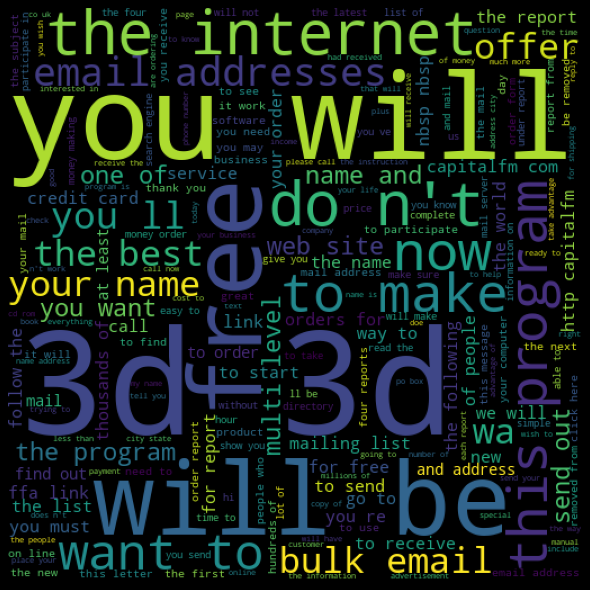

In [18]:
spam_words = ' '.join(list(mails[mails['label'] == 1]['message']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

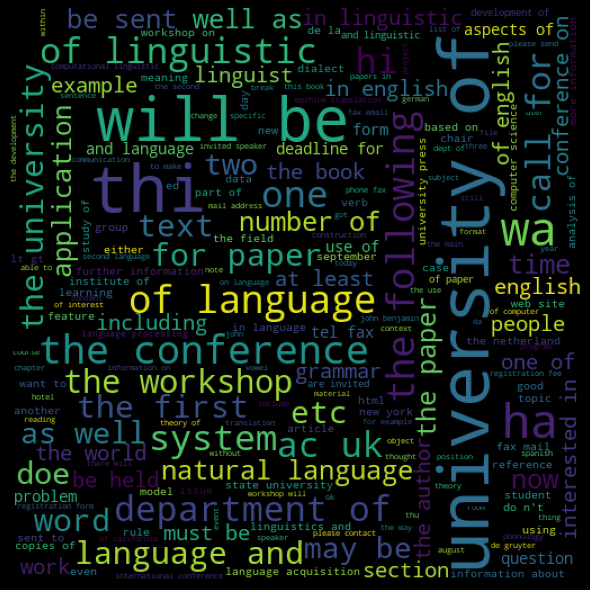

In [19]:
ham_words = ' '.join(list(mails[mails['label'] == 0]['message']))
ham_wc = WordCloud(width = 512,height = 512).generate(ham_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [20]:
trainData.head()

,message,label
0,content - length : 3386 apple-iss research cen...,0
1,"lang classification grimes , joseph e . and ba...",0
2,i am posting this inquiry for sergei atamas ( ...,0
3,a colleague and i are researching the differin...,0
4,earlier this morning i was on the phone with a...,0


In [21]:
trainData['label'].value_counts()

0    5472
1     908
Name: label, dtype: int64

In [22]:
testData.head()

,message,label
0,content - length : 4437 call for papers is the...,0
1,call for papers linguistics session - - midwes...,0
2,this is stimulated by richard sproat 's query ...,0
3,the georgetown arabic department of the school...,0
4,please note that the street address for the de...,0


In [23]:
testData['label'].value_counts()

0    1765
1     320
Name: label, dtype: int64

In [24]:
def process_message(message, lower_case = True, stem = True, stop_words = True, gram = 2):
    if lower_case:
        message = message.lower()
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]
        print(words)
    return words

In [25]:
class SpamClassifier(object):
    def __init__(self, trainData, method = 'tf-idf'):
        self.mails, self.labels = trainData['message'], trainData['label']
        self.method = method

    def train(self):
        self.calc_TF_and_IDF()
        if self.method == 'tf-idf':
            self.calc_TF_IDF()
        else:
            self.calc_prob()

    def calc_prob(self):
        self.prob_spam = dict()
        self.prob_ham = dict()
        for word in self.tf_spam:
            self.prob_spam[word] = (self.tf_spam[word] + 1) / (self.spam_words + \
                                                                len(list(self.tf_spam.keys())))
        for word in self.tf_ham:
            self.prob_ham[word] = (self.tf_ham[word] + 1) / (self.ham_words + \
                                                                len(list(self.tf_ham.keys())))
        self.prob_spam_mail, self.prob_ham_mail = self.spam_mails / self.total_mails, self.ham_mails / self.total_mails 


    def calc_TF_and_IDF(self):
        noOfMessages = self.mails.shape[0]
        self.spam_mails, self.ham_mails = self.labels.value_counts()[1], self.labels.value_counts()[0]
        self.total_mails = self.spam_mails + self.ham_mails
        self.spam_words = 0
        self.ham_words = 0
        self.tf_spam = dict()
        self.tf_ham = dict()
        self.idf_spam = dict()
        self.idf_ham = dict()
        for i in range(noOfMessages):
            message_processed = process_message(self.mails[i])
            count = list() #To keep track of whether the word has ocured in the message or not.
                           #For IDF
            for word in message_processed:
                if self.labels[i]:
                    self.tf_spam[word] = self.tf_spam.get(word, 0) + 1
                    self.spam_words += 1
                else:
                    self.tf_ham[word] = self.tf_ham.get(word, 0) + 1
                    self.ham_words += 1
                if word not in count:
                    count += [word]
            for word in count:
                if self.labels[i]:
                    self.idf_spam[word] = self.idf_spam.get(word, 0) + 1
                else:
                    self.idf_ham[word] = self.idf_ham.get(word, 0) + 1

    def calc_TF_IDF(self):
        self.prob_spam = dict()
        self.prob_ham = dict()
        self.sum_tf_idf_spam = 0
        self.sum_tf_idf_ham = 0
        for word in self.tf_spam:
            self.prob_spam[word] = (self.tf_spam[word]) * log((self.spam_mails + self.ham_mails) \
                                                          / (self.idf_spam[word] + self.idf_ham.get(word, 0)))
            self.sum_tf_idf_spam += self.prob_spam[word]
        for word in self.tf_spam:
            self.prob_spam[word] = (self.prob_spam[word] + 1) / (self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
            
        for word in self.tf_ham:
            self.prob_ham[word] = (self.tf_ham[word]) * log((self.spam_mails + self.ham_mails) \
                                                          / (self.idf_spam.get(word, 0) + self.idf_ham[word]))
            self.sum_tf_idf_ham += self.prob_ham[word]
        for word in self.tf_ham:
            self.prob_ham[word] = (self.prob_ham[word] + 1) / (self.sum_tf_idf_ham + len(list(self.prob_ham.keys())))
            
    
        self.prob_spam_mail, self.prob_ham_mail = self.spam_mails / self.total_mails, self.ham_mails / self.total_mails 
                    
    def classify(self, processed_message):
        pSpam, pHam = 0, 0
        for word in processed_message:                
            if word in self.prob_spam:
                pSpam += log(self.prob_spam[word])
            else:
                if self.method == 'tf-idf':
                    pSpam -= log(self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
                else:
                    pSpam -= log(self.spam_words + len(list(self.prob_spam.keys())))
            if word in self.prob_ham:
                pHam += log(self.prob_ham[word])
            else:
                if self.method == 'tf-idf':
                    pHam -= log(self.sum_tf_idf_ham + len(list(self.prob_ham.keys()))) 
                else:
                    pHam -= log(self.ham_words + len(list(self.prob_ham.keys())))
            pSpam += log(self.prob_spam_mail)
            pHam += log(self.prob_ham_mail)
        return pSpam >= pHam
    
    def predict(self, testData):
        result = dict()
        for (i, message) in enumerate(testData):
            processed_message = process_message(message)
            result[i] = int(self.classify(processed_message))
        return result

In [26]:
def metrics(labels, predictions):
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    for i in range(len(labels)):
        true_pos += int(labels[i] == 1 and predictions[i] == 1)
        true_neg += int(labels[i] == 0 and predictions[i] == 0)
        false_pos += int(labels[i] == 0 and predictions[i] == 1)
        false_neg += int(labels[i] == 1 and predictions[i] == 0)
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    Fscore = 2 * precision * recall / (precision + recall)
    accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)

    print("Точность: ", precision)
    print("Полнота: ", recall)
    print("F-мера: ", Fscore)
    print("Численная оценка качества алгоритма: ", accuracy)

In [27]:
sc_tf_idf = SpamClassifier(trainData, 'tf-idf')
sc_tf_idf.train()
save(sc_tf_idf)
preds_tf_idf = sc_tf_idf.predict(testData['message'])
metrics(testData['label'], preds_tf_idf)

Точность:  0.849624060150376
Полнота:  0.70625
F-мера:  0.7713310580204779
Численная оценка качества алгоритма:  0.9357314148681055


In [28]:
pm = process_message('receive message member safemail list . wish part listclick here ')
sc_tf_idf.classify(pm)
if sc_tf_idf.classify(pm) == True:
    print("Спам")
else:
    print("Не спам")

Спам


In [29]:
pm = process_message('fourth conference afroasiatic languages soas , london 25-27 june 1998 guest speakers : robert hoberman , paul newman , john saeed , baye yimam call abstracts - - - - - - - - - - - - - - - - - - - - fourth conference afro - asiatic language hold 25 - 27th june , 1998 , london , england , organise school oriental african study ( soas ) . aim conference promote research theoretical linguistics relation afro - asiatic language . editorial committee hope undertake publication collection papers base presentation colloquium , volume series study afro - asiatic grammar ( holland academic graphic ) . abstract invite thirty minute talk ( 30 + 10 ) area syntax , morphology phonology . abstract less one page exceed two page . send five anonymous copy abstract one copy name author ( s ) institution ( s ) . include card contain follow information : name author ( s ) , title paper , address affiliation , phone number , fax e-mail address ( available ) . abstract must receive 15th february 1998 ( extend deadline ) . e - mail fax submission accept . send one anonymous abstract case . abstract anonymously review . address abstract : conference afro - asiatic language selection committee centre african study soas thornhaugh st . , russell square london , wc1h 0xg , u . k . fax : + 44 - ( 0 ) 171-323 - 6254 e - mail : cal @ soa . ac . uk website establish = january 1998 : http : \ \ www . soa . ac . uk \ linguistics local committee : richard hayward , africa department , soas ; bruce ingham , linguistic department , soas ; jamal ouhallum , queen mary & westfield college ; denise perrett , soas ')
sc_tf_idf.classify(pm)
if sc_tf_idf.classify(pm) == True:
    print("Спам")
else:
    print("Не спам")

Не спам


In [30]:
maills = pd.read_csv('SpamCollection',
                   sep='\t',
                   header=None,
                   names=['label', 'message'])

maills['label'] = maills.label.map({'ham': 0, 'spam': 1})

df = pd.concat((mailz, maills), ignore_index=True, sort=True)
df['message'] = df.message.map(lambda x: x.lower())
df['message'] = df.message.str.replace('[^\w\s]', '')
df['message'] = df['message'].apply(nltk.word_tokenize)

print(df)
stemmer = PorterStemmer()

df['message'] = df['message'].apply(lambda x: [stemmer.stem(y) for y in x])

# Преобразование списока слов в разделенные пробелами строки
df['message'] = df['message'].apply(lambda x: ' '.join(x))

count_vect = CountVectorizer()
counts = count_vect.fit_transform(df['message'])

transformer = TfidfTransformer().fit(counts)

counts = transformer.transform(counts)

X_train, X_test, y_train, y_test = train_test_split(counts, df['label'], test_size=0.1, random_state=69)

model = MultinomialNB().fit(X_train, y_train)

predicted = model.predict(X_test)

print("Точность классификации для тестового набора данных", np.mean(predicted == y_test))

print(len(y_test), "Размер тестовой выборки")
print(confusion_matrix(y_test, predicted)[0][0], "Количество легитимных писем попавших в не спам")
print(confusion_matrix(y_test, predicted)[0][1], "Количество легитимных писем попавших в спам")
print(confusion_matrix(y_test, predicted)[1][0], "Количество спам писем попавших в не спам")
print(confusion_matrix(y_test, predicted)[1][1], "Количество спам писем попавших в спам")

      label                                            message
0         0  [content, length, 3386, appleiss, research, ce...
1         0  [lang, classification, grimes, joseph, e, and,...
2         0  [i, am, posting, this, inquiry, for, sergei, a...
3         0  [a, colleague, and, i, are, researching, the, ...
4         0  [earlier, this, morning, i, was, on, the, phon...
...     ...                                                ...
8460      1  [this, is, the, 2nd, time, we, have, tried, 2,...
8461      0       [will, ü, b, going, to, esplanade, fr, home]
8462      0  [pity, was, in, mood, for, that, soany, other,...
8463      0  [the, guy, did, some, bitching, but, i, acted,...
8464      0                   [rofl, its, true, to, its, name]

[8465 rows x 2 columns]
Точность классификации для тестового набора данных 0.8831168831168831
847 Размер тестовой выборки
723 Количество легитимных писем попавших в не спам
0 Количество легитимных писем попавших в спам
99 Количество спам писем

In [31]:
preds_tf_idf = sc_tf_idf.predict(testData['message'])
metrics(testData['label'], preds_tf_idf)

Точность:  0.849624060150376
Полнота:  0.70625
F-мера:  0.7713310580204779
Численная оценка качества алгоритма:  0.9357314148681055
